# Pythonによるマーケティングミックスモデリング （MMM：Marketing Mix Modeling）超入門 その2 アドストック（Ad Stock）を考慮した線形回帰モデル

url: https://www.salesanalytics.co.jp/datascience/datascience098/

url: https://www.salesanalytics.co.jp/mmm-intro/

    本当に売上に貢献している広告は、どの広告か？

    売上と広告媒体等との関係性をモデリングし、どの広告媒体が売上にどれほど貢献していたのか分析することができます。

    それが、マーケティングミックスモデリング（MMM：Marketing Mix Modeling）です。

    前回は、「線形回帰モデルでMMMを作ろう！」というお話しをします。

    url: https://www.salesanalytics.co.jp/datascience/datascience097/

    単純な線形回帰モデルでも、それなりのモデルが作れます。

    ただ、このモデルには、ある致命的な欠陥があります。アドストック（Ad Stock）を考慮していないということです。

    アドストック（Ad Stock）を考慮したモデルにした方がいいでしょう。

    ちなみに、アドストック（Ad Stock）を考慮するとは、残存効果を考慮するということです。
    ある日の広告宣伝活動が、その日だけに効果があるのではなく、次の日以降もその効果が続くということです。
    キャリーオーバー（Carryover）効果と表現されることもあります。

    ということで今回は、「アドストック（Ad Stock）を考慮した線形回帰モデル」についてお話しします。

    利用するデータは前回と同じです。

## 利用するデータセット（前回と同じ）
    今回利用するデータセットの変数です。

    Week：週
    Sales：売上
    TVCM：TV CMのコスト
    Newspaper：新聞の折り込みチラシのコスト
    Web：Web広告のコスト

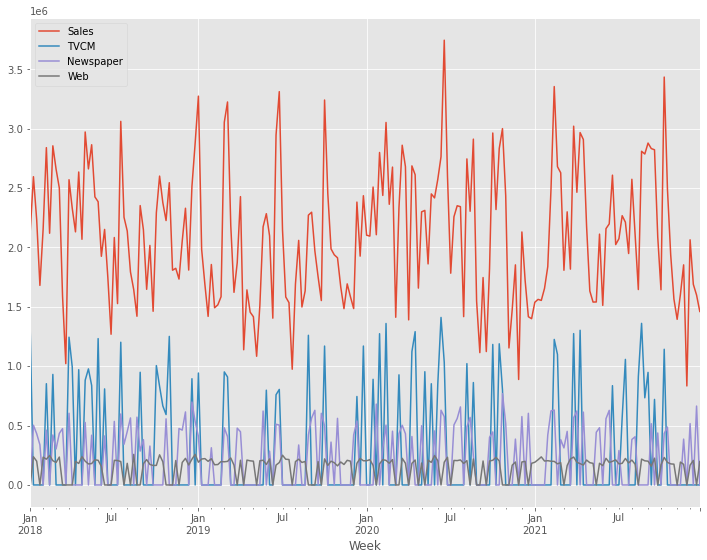

    以下からダウンロードできます。

    MMM.csv
    https://www.salesanalytics.co.jp/4zdt

## アドストック（Ad Stock）
### 飽和効果＋キャリーオーバー効果＝アドストック
    前回の線形モデルだと、広告などに触れたその日に、商品を購買するというモデルです。

    広告などには通常、キャリーオーバー（Carryover）効果もしくはラグ効果、残存効果と呼ばれるものがあります。

    要するに、効果が遅れてくる、もしくは、効果が後々まで残っている、というものです。

    例えば、高価な商品ですと、広告などに触れた瞬間に購買するというよりも、数日もしくは数週間後に、慎重に検討した後に購買することでしょう。

    消費財などの比較的安価な商品でも、何度も広告などに触れているうちに、購買したくなり、数日後に購買するということもあることでしょう。

    以下は、100の効果が、徐々に薄れながらも残存して残っているイメージです。縦軸は効果で、横軸は時間軸です。詳細は、後で説明します。

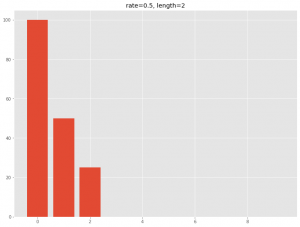

    前回の線形回帰モデルだと、ある広告にコストをかければかけるほど、売上は無限に増えていきます。

    しかし、現実は異なります。

    ある広告にコストをかければかけるほど、売上の上昇幅は鈍くなります。
    経済学でいうところの収穫逓減が起こります。売上は飽和し、いくらコストをかけても売上が伸びなくなります。

    以下は、横軸は広告などの投入量で、縦軸は効果の大きさです。詳細は、後で説明します。

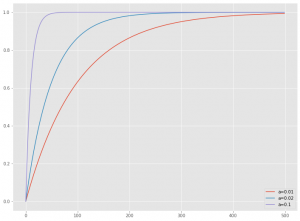

    飽和効果（収穫逓減）やキャリーオーバー（Carryover）効果を考慮したモデルがいいでしょう。
    この2つを考慮した数値変換（変換器）の機能がアドストック（Ad Stock）です。

    アドストック（Ad Stock）を考慮した線形回帰モデルで目的変数である売上（Sales）を予測するとは、
    広告などの説明変数のデータ（今回の例では、広告などのコスト）を数値変換（変換器）し、
    線形回帰モデルの新たなインプットデータを作り、
    そのインプットデータを使い線形回帰モデルで目的変数である売上（Sales）を予測することです。

    元の説明変数のデータを数値変換（変換器）し、このデータを使い線形回帰モデルを構築します。
    この一連の処理の流れを機械学習っぽい用語で表現するとパイプラインと呼びます。

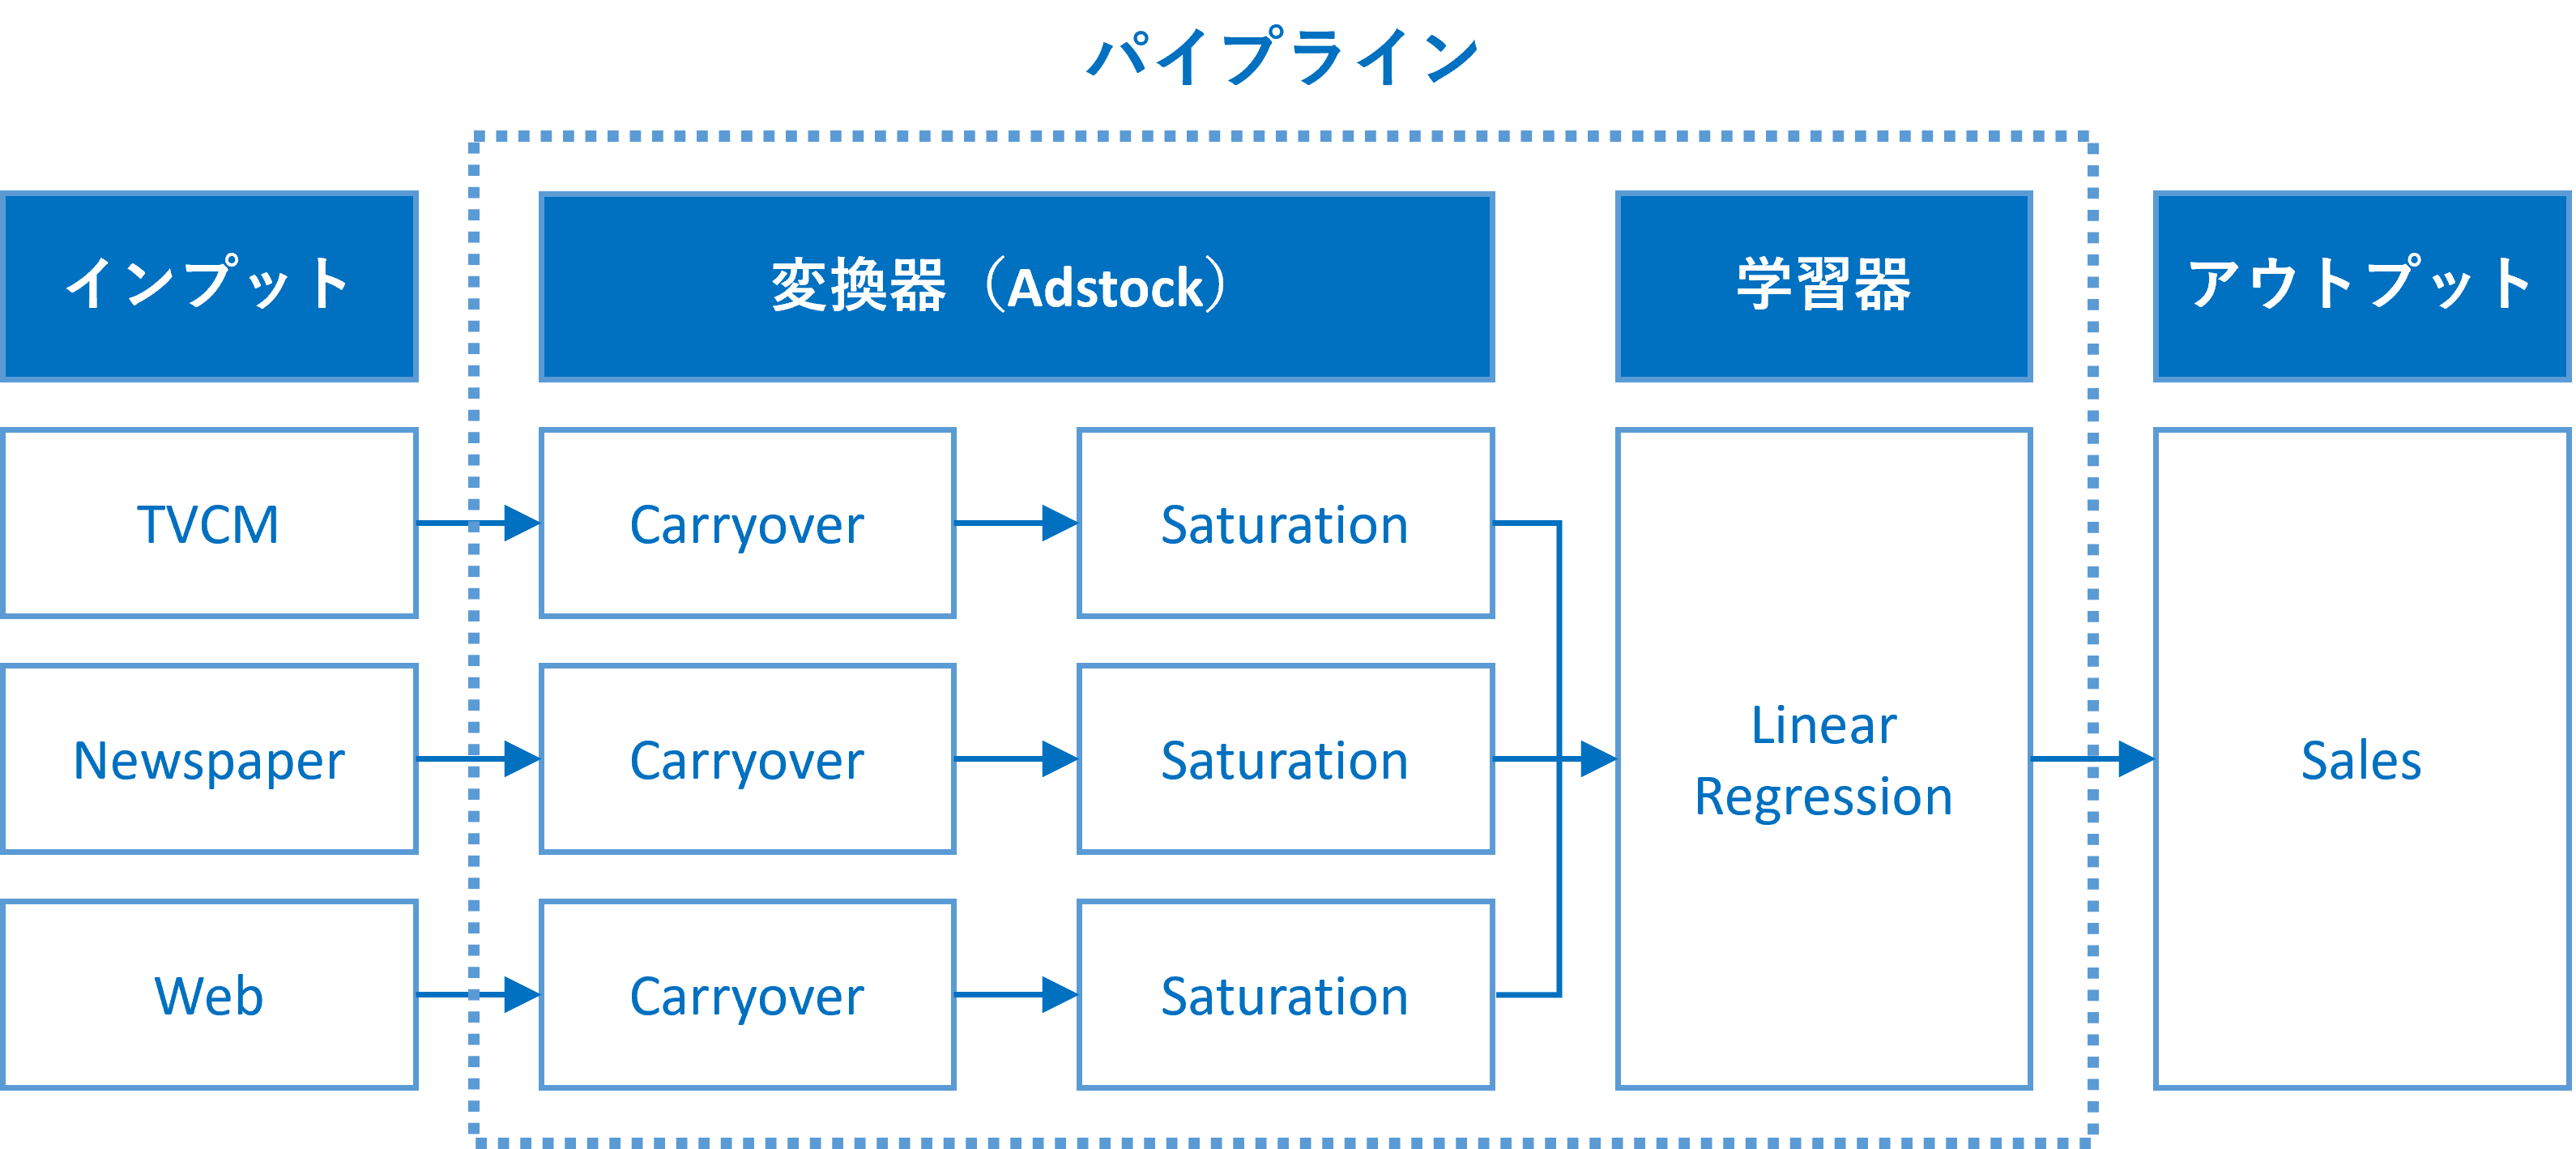

## パイプライン（入力→変換器→学習器→出力）
    今回の場合ですと、2つの変換器と1つの学習器が必要になります。

    変換器
    ・キャリーオーバー効果モデル
    ・飽和モデル
    学習器
    ・線形回帰モデル
    今回利用するキャリーオーバー効果モデルと飽和モデルについて簡単に説明します。

## キャリーオーバー効果モデル

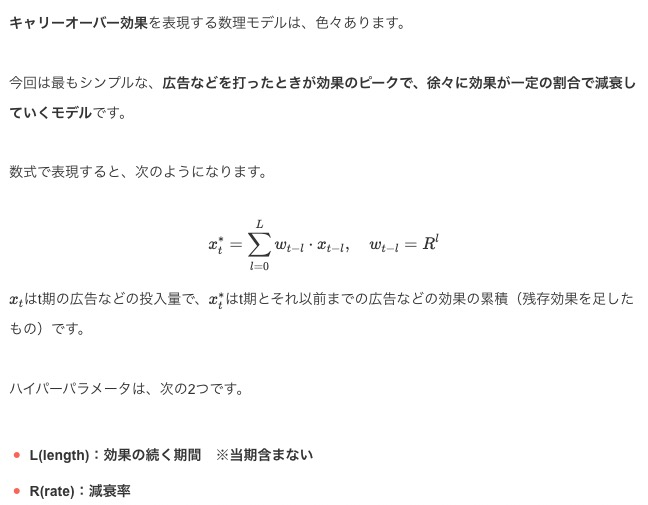

    期間とは、どのくらいまで考慮するか、ということです。

    例えば、減衰率50%で期間3の場合、以下のようになります。

    ・当期：100
    ・次期：50
    ・次々期：25
    ・次次々期：12.5
    ・次次次々期：0
    ・次次次次々期以降：0

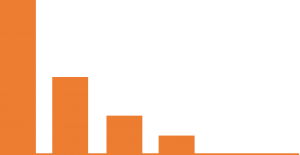

    例えば、隔期に広告を100打った場合、それが積み重なります。

    ・当期：100
    ・次期：50
    ・次々期：25+100=125
    ・次次々期：12.5+50=62.5
    ・次次次々期：0+25+100=125
    ・次次次次々期：0+12.5+50=62.5

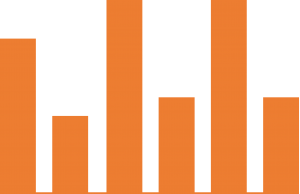

## 飽和モデル
    飽和（収穫逓減）を表現する数理モデルは、色々あります。

    今回は、最もシンプルな指数関数
    1−exp(−ax) でモデル化します。
    a はハイパーパラメータです。

    以下は、先程説明した図（横軸は広告などの投入量で、縦軸は効果の大きさ）です。

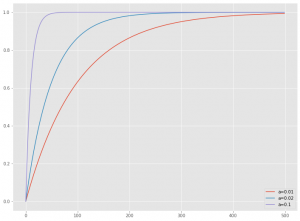

## MMMの実施
### 必要なライブラリーの読み込み
    必要なライブラリーを読み込みます。

    以下、コードです。

In [1]:
pip install optuna

In [2]:
import numpy as np
import pandas as pd

from scipy.signal import convolve2d

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn import set_config

from sklearn.linear_model import LinearRegression

from optuna.integration import OptunaSearchCV
from optuna.distributions import UniformDistribution, IntUniformDistribution

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ
#指数表記しない設定
np.set_printoptions(precision=3,suppress=True)
pd.options.display.float_format = '{:.3f}'.format

## データセットの読み込み（前回と同じ）
    データセットを読み込みます。

    以下、コードです。

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208 entries, 2018-01-07 to 2021-12-26
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sales      208 non-null    int64
 1   TVCM       208 non-null    int64
 2   Newspaper  208 non-null    int64
 3   Web        208 non-null    int64
dtypes: int64(4)
memory usage: 8.1 KB
None


,Sales,TVCM,Newspaper,Web
Week,,,,
2018-01-07,2132000,1312200,0,0
2018-01-14,2596100,0,502900,237400
2018-01-21,2236200,0,432100,200600
2018-01-28,1680900,0,338400,0
2018-02-04,2155400,0,0,234000


<Axes: xlabel='Week'>

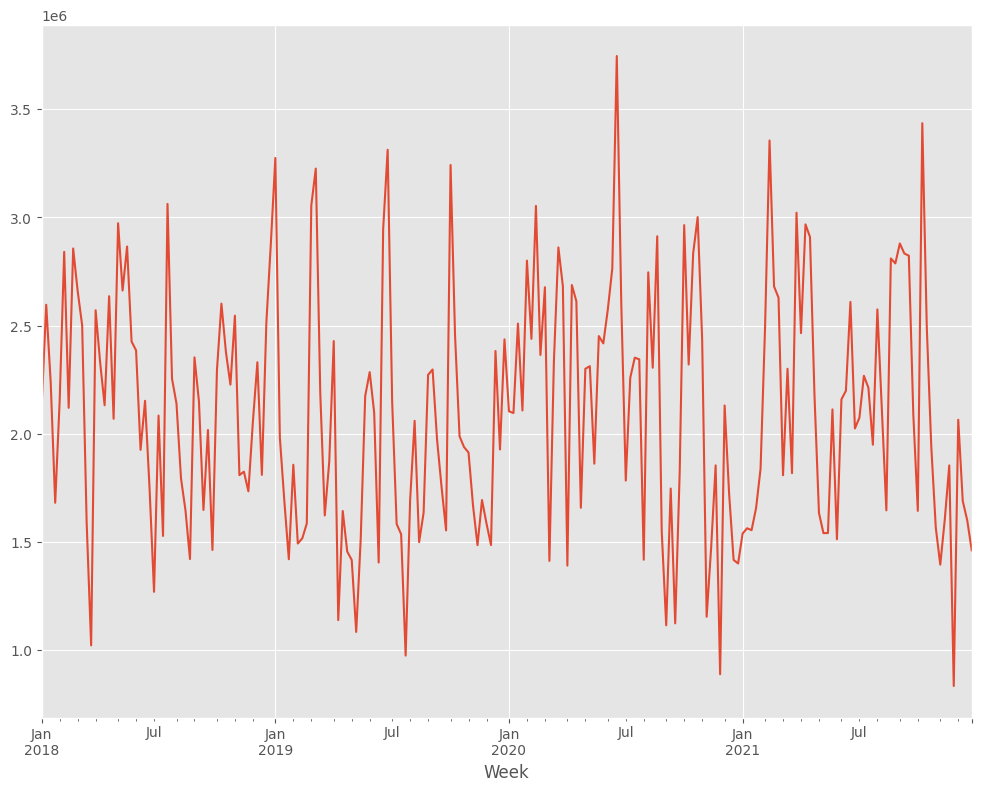

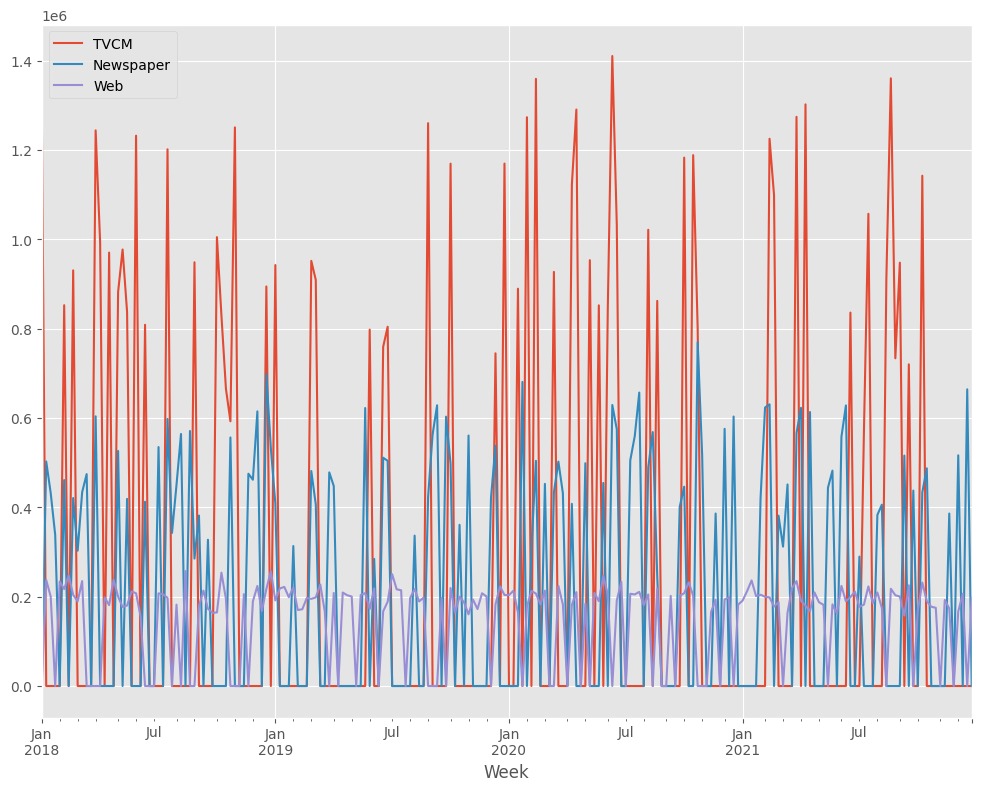

In [3]:
# データセット読み込み
url = 'https://www.salesanalytics.co.jp/4zdt'
df = pd.read_csv(url,
                 parse_dates=['Week'],
                 index_col='Week'
                )

# データ確認
print(df.info()) #変数の情報
display(df.head()) #データの一部

# 説明変数Xと目的変数yに分解
X = df.drop(columns=['Sales'])
y = df['Sales']

# グラフ化
y.plot()
X.plot()

## アドストックを考慮しない線形回帰モデル
    アドストックを考慮しない線形回帰モデルを構築し、どの程度の精度を持ったものだったのかを見てみます。

    ちなみに、前回と同じものです。

    線形回帰モデルのインスタンスを作ります。

    以下、コードです。

In [4]:
# 線形回帰モデルのインスタンス
lr = LinearRegression()

    線形回帰モデルが、どの程度の予測精度を持ったモデルになるのかを確かめるために、
    時系列のCV（クロスバリデーション）を実施します。今回は、デフォルトの5分割のCVです。

    以下、コードです。

In [5]:
# クロスバリデーションで精度検証（R2）
np.mean(cross_val_score(lr,
                        X, y,
                        cv=TimeSeriesSplit()
                       )
       )

0.7027465640779165

    全データでモデルを構築し、予測精度（R**2）を見てみます。

    以下、コードです。

In [6]:
# 全データで精度検証（R2）
lr.fit(X, y)
lr.score(X, y)

0.7400400171566186

## アドストックの関数
    以下の2つのモデル（変換器）の関数を定義し利用することで、アドストックを表現します。

    ・飽和モデル
    ・キャリーオーバー効果モデル

## 飽和モデル
    飽和モデル（関数）を定義します。

    指数関数 1−exp(−ax) です。
    a のハイパーパラメータで、形状が異なってきます。

    以下、コードです。

In [7]:
# 飽和モデル（関数）の定義
def Saturation(X,a):
    return 1 - np.exp(-a*X)

    この関数の実行例です。

    以下、コードです。

     a=0.01  a=0.02  a=0.1
0     0.000   0.000  0.000
1     0.010   0.020  0.095
2     0.020   0.039  0.181
3     0.030   0.058  0.259
4     0.039   0.077  0.330
..      ...     ...    ...
495   0.993   1.000  1.000
496   0.993   1.000  1.000
497   0.993   1.000  1.000
498   0.993   1.000  1.000
499   0.993   1.000  1.000

[500 rows x 3 columns]


<Axes: >

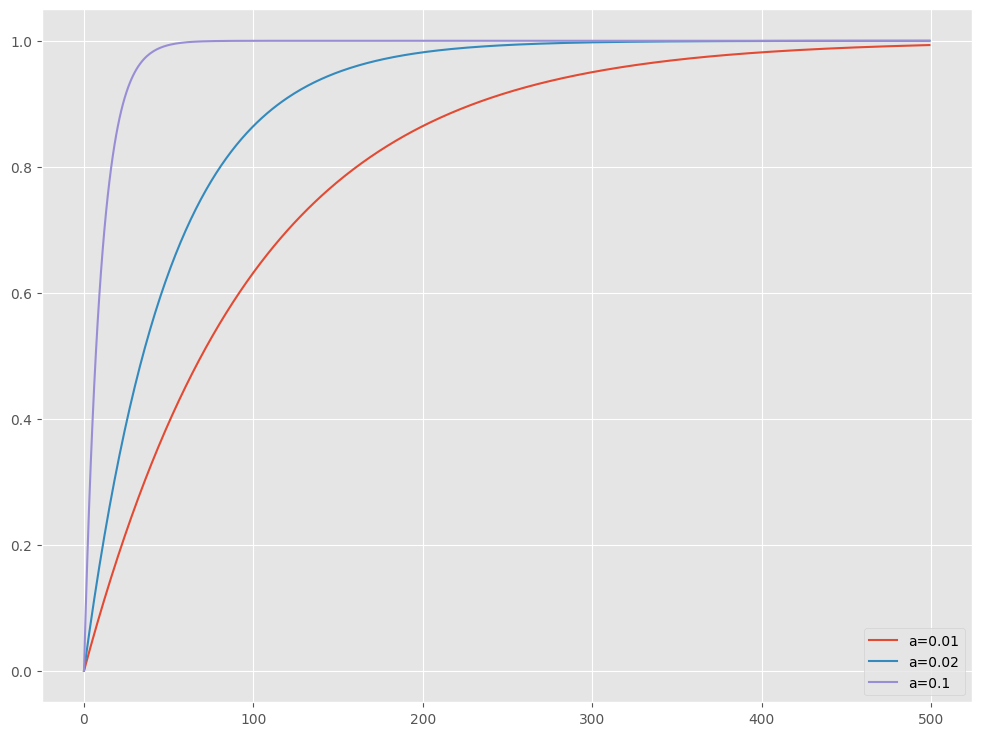

In [8]:
# 飽和モデル（関数）の例
exp_dat = pd.DataFrame(range(500)) #入力データ

exp_sat = pd.DataFrame(index=exp_dat.index)
exp_sat['a=0.01'] = Saturation(exp_dat,0.01)
exp_sat['a=0.02'] = Saturation(exp_dat,0.02)
exp_sat['a=0.1'] = Saturation(exp_dat,0.1)

print(exp_sat) #数値出力
exp_sat.plot() #グラフ

## キャリーオーバー効果モデル
    キャリーオーバー効果モデル（関数）を定義します。

    減衰率（rate）と期間length）がハイパーパラメータで、その値によって形状が異なってきます。

    以下、コードです。

In [9]:
# キャリーオーバー効果モデル（関数）の定義
def Carryover(X: np.ndarray, rate, length):
    filter = (
        rate ** np.arange(length + 1)
    ).reshape(-1, 1)
    convolution = convolve2d(X, filter)
    if length > 0 : convolution = convolution[: -length]
    return convolution

    最初100でその後0であるシンプルなケースの、この関数の実行例です。

    以下、コードです。

[[100.]
 [ 50.]
 [ 25.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]]


Text(0.5, 1.0, 'rate=0.5, length=2')

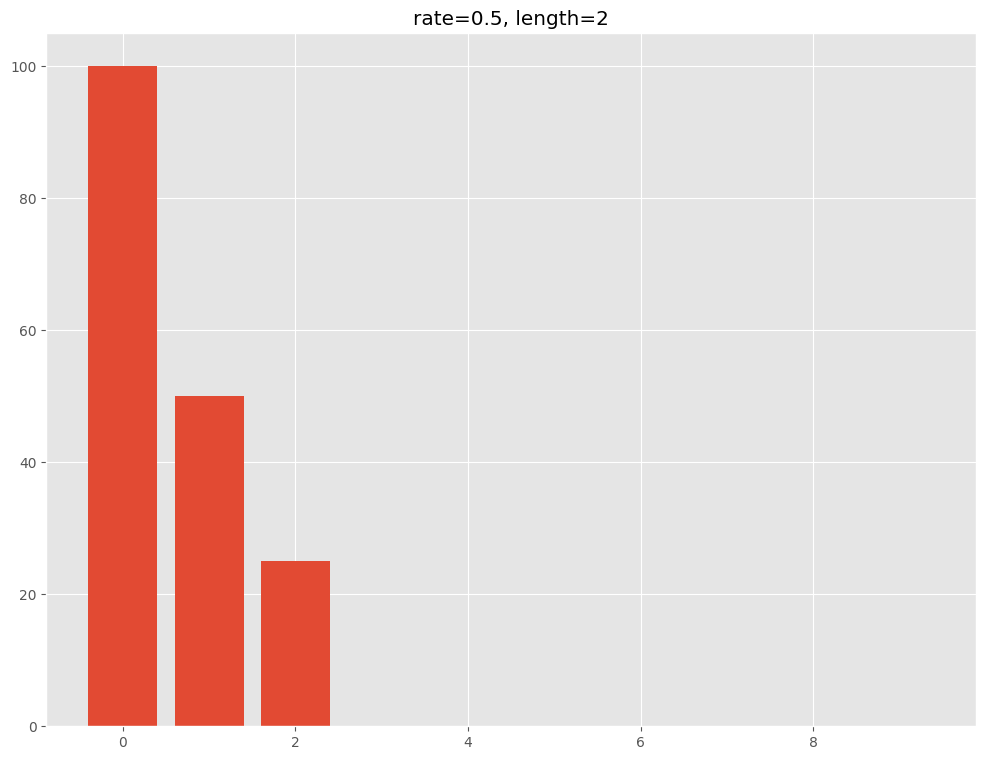

In [10]:
# キャリーオーバー効果モデル（関数）の例
## サンプルデータ
exp_dat = pd.DataFrame([100,0,0,0,0,0,0,0,0,0])

## キャリーオーバー効果
exp_co = Carryover(exp_dat, 0.5,2)

print(exp_co) #数値出力
plt.bar(exp_dat.index,exp_co[:,0]) #グラフ
plt.title('rate=0.5, length=2')

    先程の例よりも複雑なケースで、この関数の実行例を見てみます。

    サンプルデータを作ります。

    以下、コードです。

     0
0   10
1  500
2   10
3  500


<BarContainer object of 4 artists>

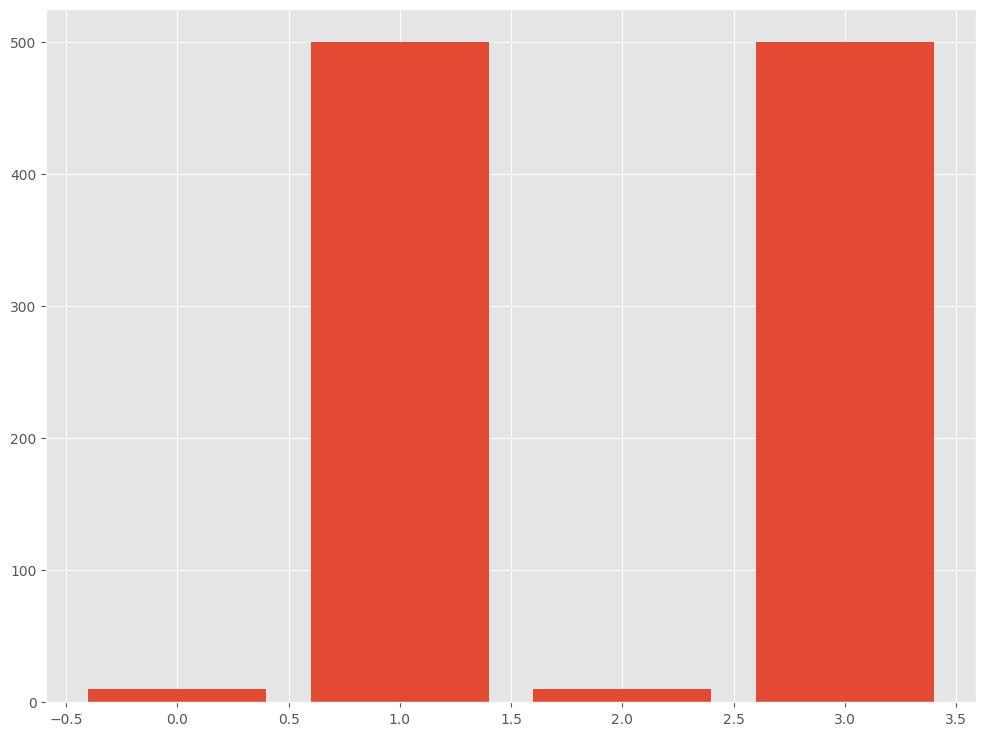

In [11]:
# サンプルデータ
exp_dat = pd.DataFrame([10,500,10,500])  #入力データ
print(exp_dat) #数値出力
plt.bar(exp_dat.index,exp_dat.values[:,0]) #グラフ

    サンプルデータに対し、この関数の実行してみます。

    以下、コードです。

[[ 10. ]
 [505. ]
 [262.5]
 [630. ]]


<BarContainer object of 4 artists>

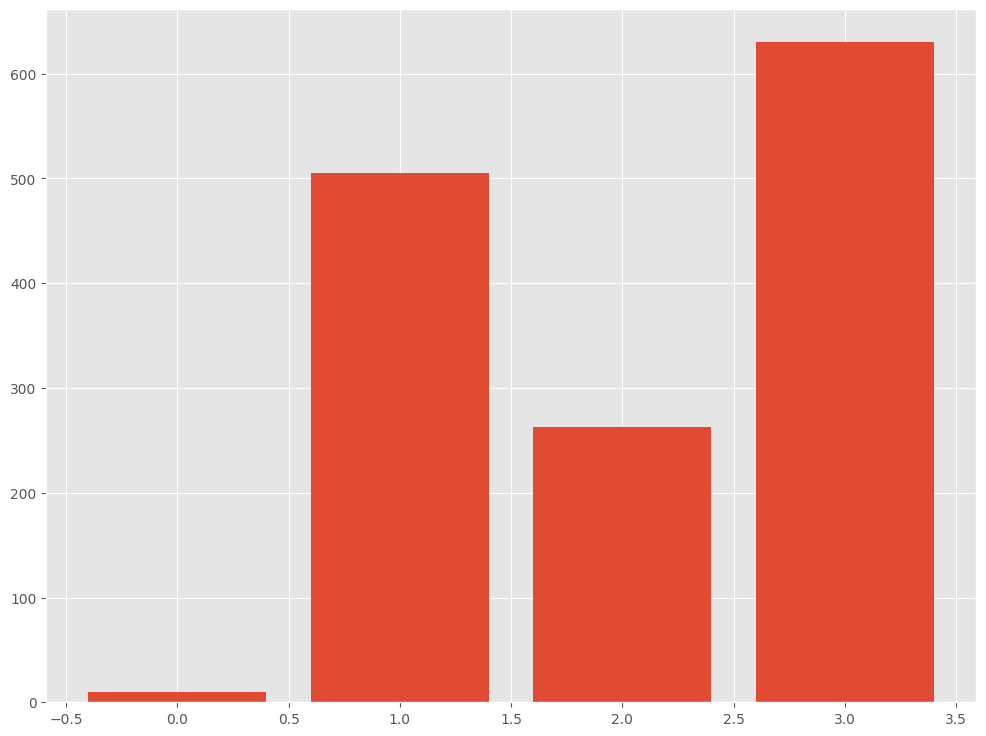

In [12]:
# キャリーオーバー効果モデル（関数）の例
exp_co = Carryover(exp_dat, 0.5,2)

print(exp_co) #数値出力
plt.bar(exp_dat.index,exp_co[:,0]) #グラフ

    飽和モデルやキャリーオーバー効果モデルを単体で使うわけではありません。

    入力データをキャリーオーバー効果モデルにインプットし、キャリーオーバー効果モデルのアウトプットが飽和モデルのインプットになります。飽和モデルのアウトプットは学習器（線形回帰モデル）のインプットになります。

    入力データ→飽和モデル→キャリーオーバー効果モデル→学習器のインプット

    先程の例で、「飽和モデル→キャリーオーバー効果モデル」を実行してみます。

    以下、コードです。

[[0.095]
 [0.994]
 [0.928]
 [0.998]]


<BarContainer object of 4 artists>

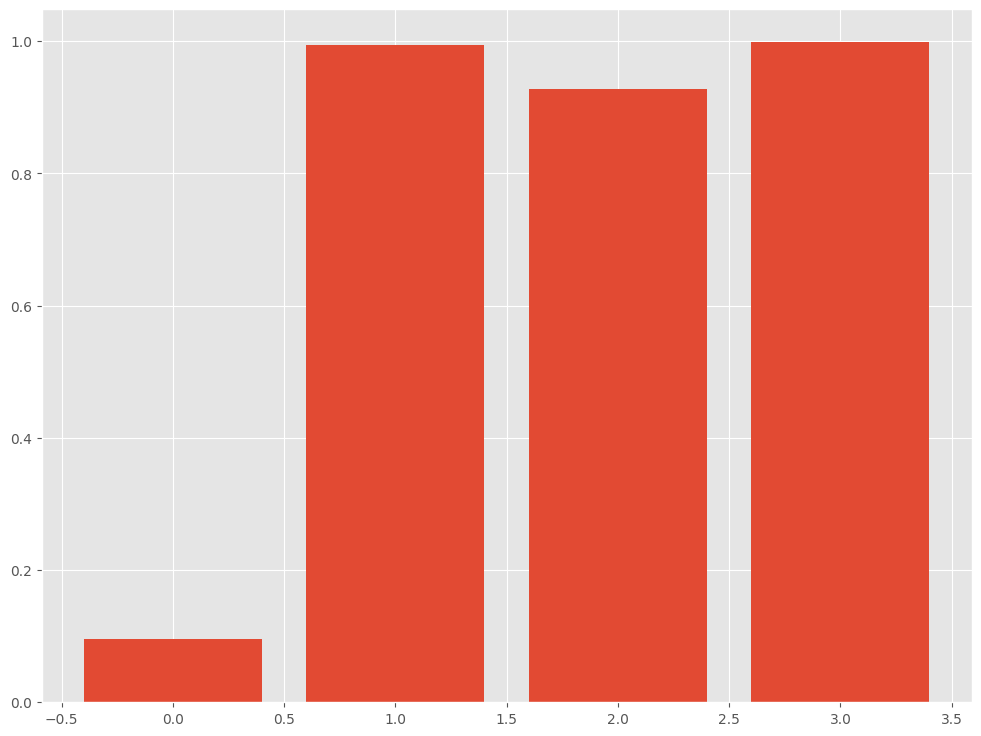

In [13]:
# 「入力→キャリーオーバー効果モデル→飽和モデル→出力」の例
exp_sat_co = Saturation(Carryover(exp_dat, 0.5,2),0.01)

print(exp_sat_co) #数値出力
plt.bar(exp_dat.index,exp_sat_co[:,0]) #グラフ

## アドストックを考慮した線形回帰モデル
    パイパーパラメータを設定します。

    以下、コードです。



In [14]:
# TVCMのハイパーパラメータの設定
TVCM_carryover_rate = 0.5
TVCM_carryover_length = 4
TVCM_saturation_a = 0.000002

# Newspaperのハイパーパラメータの設定
Newspaper_carryover_rate = 0.5
Newspaper_carryover_length = 2
Newspaper_saturation_a = 0.000002

# Webのハイパーパラメータの設定
Web_carryover_rate = 0.5
Web_carryover_length = 0
Web_saturation_a = 0.000002

    どのようなキャリーオーバー効果なのかを見てみます。

    以下、コードです。



Text(0.5, 1.0, 'Web')

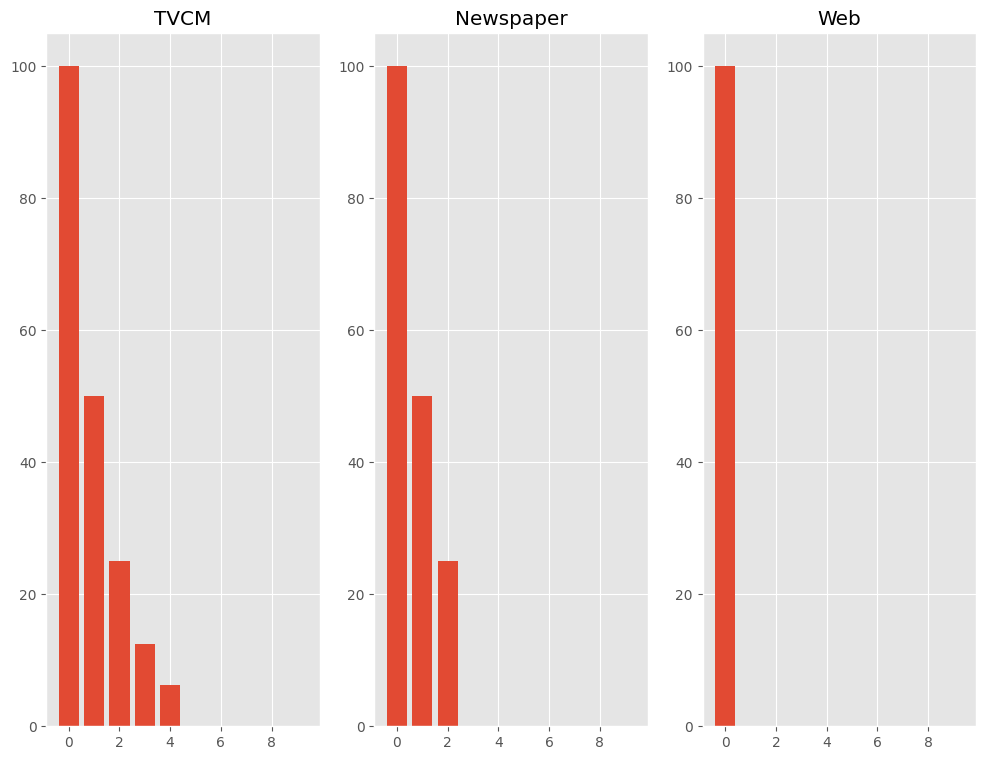

In [15]:
# キャリーオーバー効果モデルの出力例
## サンプルデータ
exp_dat = pd.DataFrame([100,0,0,0,0,0,0,0,0,0])

## キャリーオーバー効果

### TVCM
exp_co_TVCM= Carryover(
    exp_dat,
    TVCM_carryover_rate,
    TVCM_carryover_length
)

### Newspaper
exp_co_Newspaper = Carryover(
    exp_dat,
    Newspaper_carryover_rate,
    Newspaper_carryover_length
)

### Web
exp_co_Web = Carryover(
    exp_dat,
    Web_carryover_rate,
    Web_carryover_length
)

## グラフ
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False)

### TVCM
axes[0].bar(exp_dat.index,
            exp_co_TVCM[:,0]
           )
axes[0].set_title('TVCM')

### Newspaper
axes[1].bar(exp_dat.index,
            exp_co_Newspaper[:,0]
           )
axes[1].set_title('Newspaper')

### Web
axes[2].bar(exp_dat.index,
            exp_co_Web[:,0]
           )
axes[2].set_title('Web')

    説明変数X（広告などのコスト）のデータに対し、キャリーオーバー効果モデルと飽和モデルを使い、学習器（線形回帰モデル）のインプットを作ります。

    以下、コードです。

In [16]:
# TVの値の変換
X_TVCM = Saturation(Carryover(X[['TVCM']],
                            TVCM_carryover_rate,
                            TVCM_carryover_length),
                  TVCM_saturation_a)

# Newspaperの値の変換
X_Newspaper = Saturation(Carryover(X[['Newspaper']],
                               Newspaper_carryover_rate,
                               Newspaper_carryover_length),
                     Newspaper_saturation_a)

# Webの値の変換
X_Web = Saturation(Carryover(X[['Web']],
                                 Web_carryover_rate,
                                 Web_carryover_length),
                       Web_saturation_a)

# 変換した値の結合（DataFrame型へ）
X_trans = pd.DataFrame(np.concatenate([X_TVCM,
                                       X_Newspaper,
                                       X_Web],
                                      1))
X_trans.columns = ['TVCM','Newspaper','Web']

X_trans #確認

,TVCM,Newspaper,Web
0,0.928,0.000,0.000
1,0.731,0.634,0.378
2,0.481,0.745,0.330
3,0.280,0.743,0.000
4,0.151,0.426,0.374
...,...,...,...
203,0.000,0.320,0.000
204,0.000,0.707,0.284
205,0.000,0.404,0.338
206,0.000,0.796,0.000


    この説明変数Xを変換し作ったデータを使い、線形回帰モデルを作り精度検証してみます。

    線形回帰モデルが、どの程度の予測精度を持ったモデルになるのかを確かめるために、
    時系列のCV（クロスバリデーション）を実施します。今回は、デフォルトの5分割のCVです。

    以下、コードです。

In [17]:
# クロスバリデーションで精度検証（R2）
np.mean(cross_val_score(lr,
                        X_trans, y,
                        cv=TimeSeriesSplit()
                       )
       )

0.7820052251712644

    全データでモデルを構築し、予測精度（R**2）を見てみます。

    以下、コードです。

In [18]:
# 全データで精度検証（R2）
lr.fit(X_trans, y)
lr.score(X_trans, y)

0.8263950653563382

前回な線形回帰モデルに対し、以下のように（R**2）が変化しました。

・CVのR**2の平均値：0.70→0.78
・全データ利用した場合のR**2：0.74→0.83

## アドストックを考慮した線形回帰モデル（Optunaでハイパーパラメータチューニング）
    変換器と学習器を繋いだパイプラインを作り、Optunaでハイパーパラメータ探索を実施し最適なモデルを作ります。

    ハイパーパラメータは、変換器の以下の3つです。

    キャリーオーバー効果モデル
    ・減衰率（rate）
    ・期間（length）
    飽和モデル
    ・形状パラメータa


## パイプライン構築
    飽和モデルとキャリーオーパー効果モデルを、パイプラインで利用できる変換器にします。

    以下、コードです。

In [19]:
# Pipeline用変換器（飽和モデル）
class ExponentialSaturation(BaseEstimator, TransformerMixin):

    # 初期化
    def __init__(self, a=1.0):
        self.a = a #ハイパーパラメータ

    # 学習
    def fit(self, X, y=None):
        return self

    # 処理（入力→出力）
    def transform(self, X):
        return Saturation(X,self.a)

# Pipeline用変換器（キャリーオーバー効果モデル）
class ExponentialCarryover(BaseEstimator, TransformerMixin):

    # 初期化
    def __init__(self, rate=0.5, length=1):
        self.rate = rate #ハイパーパラメータ
        self.length = length #ハイパーパラメータ

    # 学習
    def fit(self, X, y=None):
        return self

    # 処理（入力→出力）
    def transform(self, X: np.ndarray):
        return Carryover(X, self.rate, self.length)

    この変換器を使い、パイプラインを構築します。

    以下、コードです。

In [20]:
# Pipelineの構築

## 説明変数の変換部分（adstock）の定義
adstock = ColumnTransformer(
    [
     ('TVCM_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['TVCM']),
     ('Newspaper_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['Newspaper']),
     ('Web_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['Web']),
    ],
    remainder='passthrough'
)

## 説明変数の変換（adstock）→線形回帰モデル（regression）
MMM_pipe = Pipeline([
    ('adstock', adstock),
    ('regression', LinearRegression())
])

## パイプラインの確認
set_config(display='diagram')
MMM_pipe

Pipeline(steps=[('adstock',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('TVCM_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['TVCM']),
                                                 ('Newspaper_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['Newspaper']),
                                                 ('Web_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['Web'])])),
                ('regression', LinearRegression())])

## パイパーパラメータ探索の実施
    パイプラインを構築したので、パイパーパラメータを探索します。

    以下、コードです。

In [21]:
from optuna.distributions import FloatDistribution, IntDistribution

params = {
    'adstock__TVCM_pipe__carryover__rate': FloatDistribution(0, 1),
    'adstock__TVCM_pipe__carryover__length': IntDistribution(0, 6),
    'adstock__TVCM_pipe__saturation__a': FloatDistribution(0, 0.01),
    'adstock__Newspaper_pipe__carryover__rate': FloatDistribution(0, 1),
    'adstock__Newspaper_pipe__carryover__length': IntDistribution(0, 6),
    'adstock__Newspaper_pipe__saturation__a': FloatDistribution(0, 0.01),
    'adstock__Web_pipe__carryover__rate': FloatDistribution(0, 1),
    'adstock__Web_pipe__carryover__length': IntDistribution(0, 6),
    'adstock__Web_pipe__saturation__a': FloatDistribution(0, 0.01),
}


# ハイパーパラメータ探索の設定
optuna_search = OptunaSearchCV(
    estimator=MMM_pipe,
    param_distributions=params,
    n_trials=1000,
    cv=TimeSeriesSplit(),
    random_state=0
)

# 探索実施
optuna_search.fit(X, y)

<ipython-input-21-cda87af8401f>:17: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[I 2024-01-29 13:24:40,692] A new study created in memory with name: no-name-2b35d3f4-fbf3-4157-9347-e0737e8da43e
[I 2024-01-29 13:24:40,753] Trial 0 finished with value: 0.0022367901122601675 and parameters: {'adstock__TVCM_pipe__carryover__rate': 0.4860473230215504, 'adstock__TVCM_pipe__carryover__length': 4, 'adstock__TVCM_pipe__saturation__a': 0.009855760506615989, 'adstock__Newspaper_pipe__carryover__rate': 0.1955964101622225, 'adstock__Newspaper_pipe__carryover__length': 4, 'adstock__Newspaper_pipe__saturation__a': 0.00980582177099305, 'adstock__Web_pipe__carryover__rate': 0.18048029738995275, 'adstock__Web_pipe__carryover__length': 4, 'adstock__Web_pipe__saturation__a': 0.008463095456331128}. Best is trial 0 with value: 0.0022367901122601675.
[I 2024-01-29 13:24:40,836] Trial 1 finished with va

OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
               estimator=Pipeline(steps=[('adstock',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('TVCM_pipe',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCarryover()),
                                                                                           ('saturation',
                                                                                            ExponentialSaturation())]),
                                                                           ['TVCM']),
                                                                          ('Newspaper_pipe',
                                                                           Pipeline(steps=[('carryover',
                                                                                            Expone...
                                    'adstock__TVCM_pipe__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None),
                                    'adstock__Web_pipe__carryover__length': IntDistribution(high=6, log=False, low=0, step=1),
                                    'adstock__Web_pipe__carryover__rate': FloatDistribution(high=1.0, log=False, low=0.0, step=None),
                                    'adstock__Web_pipe__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None)},
               random_state=0)

    探索結果を見てみます。

    以下、コードです。

In [22]:
# 探索結果
optuna_search.best_params_

{'adstock__TVCM_pipe__carryover__rate': 0.4082766353272467,
 'adstock__TVCM_pipe__carryover__length': 6,
 'adstock__TVCM_pipe__saturation__a': 1.0457269254747647e-06,
 'adstock__Newspaper_pipe__carryover__rate': 0.6823566855859086,
 'adstock__Newspaper_pipe__carryover__length': 0,
 'adstock__Newspaper_pipe__saturation__a': 0.004716466258013259,
 'adstock__Web_pipe__carryover__rate': 0.9564127047312733,
 'adstock__Web_pipe__carryover__length': 0,
 'adstock__Web_pipe__saturation__a': 0.004662077786980708}

    探索し得られたハイパーパラメータで、どのようなキャリーオーバー効果になるのかを見てみます。

    以下、コードです。

<ipython-input-23-96fed998d3e9>:52: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[0].set_ylim(0, 100)


Text(0.5, 1.0, 'Web')

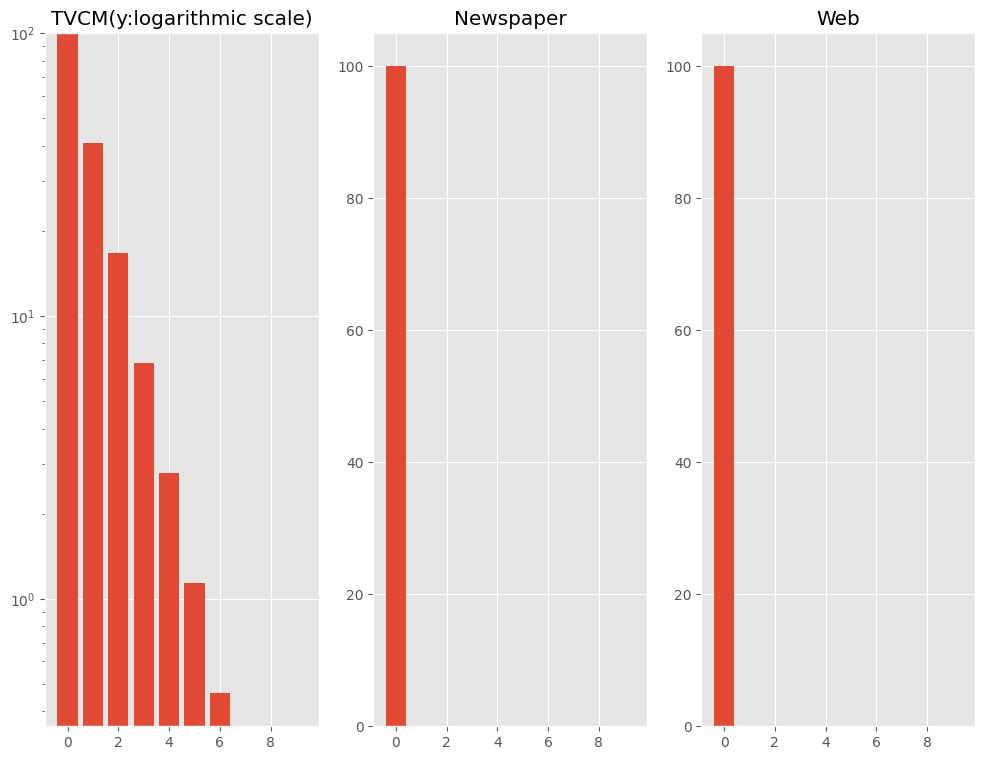

In [23]:
# キャリーオーバー効果モデルの出力例

## サンプルデータ
exp_dat = pd.DataFrame([100,0,0,0,0,0,0,0,0,0])

## ハイパーパラメータ設定

### TVCM
TVCM_carryover_rate = optuna_search.best_params_['adstock__TVCM_pipe__carryover__rate']
TVCM_carryover_length = optuna_search.best_params_['adstock__TVCM_pipe__carryover__length']

### Newspaper
Newspaper_carryover_rate = optuna_search.best_params_['adstock__Newspaper_pipe__carryover__rate']
Newspaper_carryover_length = optuna_search.best_params_['adstock__Newspaper_pipe__carryover__length']

### Web
Web_carryover_rate = optuna_search.best_params_['adstock__Web_pipe__carryover__rate']
Web_carryover_length = optuna_search.best_params_['adstock__Web_pipe__carryover__length']

## キャリーオーバー効果

### TVCM
exp_co_TVCM= Carryover(
    exp_dat,
    TVCM_carryover_rate,
    TVCM_carryover_length
)

### Newspaper
exp_co_Newspaper = Carryover(
    exp_dat,
    Newspaper_carryover_rate,
    Newspaper_carryover_length
)

### Web
exp_co_Web = Carryover(
    exp_dat,
    Web_carryover_rate,
    Web_carryover_length
)

## グラフ
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False)

### TVCM
axes[0].bar(exp_dat.index,
            exp_co_TVCM[:,0]
           )
axes[0].set_title('TVCM(y:logarithmic scale)')
axes[0].set_yscale('log')
axes[0].set_ylim(0, 100)

### Newspaper
axes[1].bar(exp_dat.index,
            exp_co_Newspaper[:,0]
           )
axes[1].set_title('Newspaper')

### Web
axes[2].bar(exp_dat.index,
            exp_co_Web[:,0]
           )
axes[2].set_title('Web')

# 以下、実行結果です。TVCMだけ対数変換し表示しています。

## 最適なハイパーパラメータでパイプラインを学習
    パイプラインのインスタンスを作ります。

    以下、コードです。

In [24]:
# パイプラインのインスタンス
MMM_pipe_best = MMM_pipe.set_params(**optuna_search.best_params_)

    線形回帰モデルが、どの程度の予測精度を持ったモデルになるのかを確かめるために、時系列のCV（クロスバリデーション）を実施します。今回は、デフォルトの5分割のCVです。

    以下、コードです。

In [25]:
# クロスバリデーションで精度検証（R2）
np.mean(cross_val_score(MMM_pipe_best,
                        X, y,
                        cv=TimeSeriesSplit()
                       )
       )

0.8674510417084506

    全データでモデルを構築し、予測精度（R**2）を見てみます。

    以下、コードです。

In [26]:
# 全データで精度検証（R2）
MMM_pipe_best.fit(X, y)
MMM_pipe_best.score(X, y)

0.8828283499537172

    前回の線形回帰モデルに比べ、以下のように（R**2）が変化しました。
    ・CVのR **2の平均値：0.70→0.82
    ・全データ利用した場合のR**2：0.74→0.84
    どのような線形回帰モデルなのか（切片と回帰係数）を見てみます。

    以下、コードです。

In [27]:
# 線形回帰モデルの切片と回帰係数
intercept = MMM_pipe_best.named_steps['regression'].intercept_ #切片
coef = MMM_pipe_best.named_steps['regression'].coef_ #回帰係数

# 回帰係数をデータフレーム化
weights = pd.Series(
    coef,
    index=X.columns
)

# 結果出力（切片と係数）
print('Intercept:\n', intercept, sep='')
print()
print('Coefficients:\n',weights, sep='')

Intercept:
1082847.9389470941

Coefficients:
TVCM        1418956.506
Newspaper    479427.539
Web          485163.673
dtype: float64


## 売上貢献度の算出
    学習し構築したパイプラインの変換器（adstock）を抽出します。

    以下、コードです。

In [28]:
# Piplineの変換器（adstock）を抽出
adstock = MMM_pipe_best.named_steps['adstock']

    説明変数を変換し、学習データのインプットデータを作ります。

    以下、コードです。



In [29]:
# 説明変数Xの変換
X_trans = pd.DataFrame(adstock.transform(X),
                       index=X.
                       index,columns=X.columns)

    先程求めた線形回帰式を使い、売上貢献度（補正前）を計算します。

    以下、コードです。

In [30]:
# 貢献度（補正前）
unadj_contribution = X_trans.mul(weights) #Xと係数を乗算
unadj_contribution = unadj_contribution.assign(Base=intercept) #切片の追加
unadj_contribution.head() #確認

,TVCM,Newspaper,Web,Base
Week,,,,
2018-01-07,1059183.190,0.000,0.000,1082847.939
2018-01-14,608628.870,479427.539,485163.673,1082847.939
2018-01-21,290117.688,479427.539,485163.673,1082847.939
2018-01-28,126511.577,479427.539,0.000,1082847.939
2018-02-04,53082.648,0.000,485163.673,1082847.939


    週ごとに各媒体の売上貢献度を合計すると、売上の予測値になります。

    以下、コードです。



In [31]:
# 貢献度の合計（yの予測値）
y_pred = unadj_contribution.sum(axis=1)
y_pred.head() #確認

Week
2018-01-07   2142031.129
2018-01-14   2656068.022
2018-01-21   2337556.840
2018-01-28   1688787.055
2018-02-04   1621094.260
dtype: float64

    元の売上の実測値を見てみます。

    以下、コードです。



In [32]:
y.head() #確認

Week
2018-01-07    2132000
2018-01-14    2596100
2018-01-21    2236200
2018-01-28    1680900
2018-02-04    2155400
Name: Sales, dtype: int64

    予測値と実測値が乖離していることが分かります。
    この乖離をなくすために、補正係数（correction factor）を計算し、売上貢献度を補正します。

    補正係数を計算します。

    以下、コードです。

In [33]:
# 補正係数
correction_factor = y.div(y_pred, axis=0)
correction_factor.head() #確認

Week
2018-01-07   0.995
2018-01-14   0.977
2018-01-21   0.957
2018-01-28   0.995
2018-02-04   1.330
dtype: float64

    この補正係数を使い、売上貢献度を補正します。

    以下、コードです。

In [34]:
# 貢献度（補正後）
adj_contribution = (unadj_contribution
                    .mul(correction_factor, axis=0)
                   )

# 順番の変更
adj_contribution = adj_contribution[['Base', 'Web', 'Newspaper', 'TVCM']]

#確認
adj_contribution.head()

,Base,Web,Newspaper,TVCM
Week,,,,
2018-01-07,1077776.963,0.000,0.000,1054223.037
2018-01-14,1058399.676,474209.773,468603.148,594887.404
2018-01-21,1035895.478,464126.899,458639.484,277538.139
2018-01-28,1077790.770,0.000,477188.494,125920.736
2018-02-04,1439749.992,645071.547,0.000,70578.461


    週×媒体別の売上貢献度が求められたので、積み上げグラフを作成し、
    どのような状況になっているのかを確認してみます。

    以下、コードです。

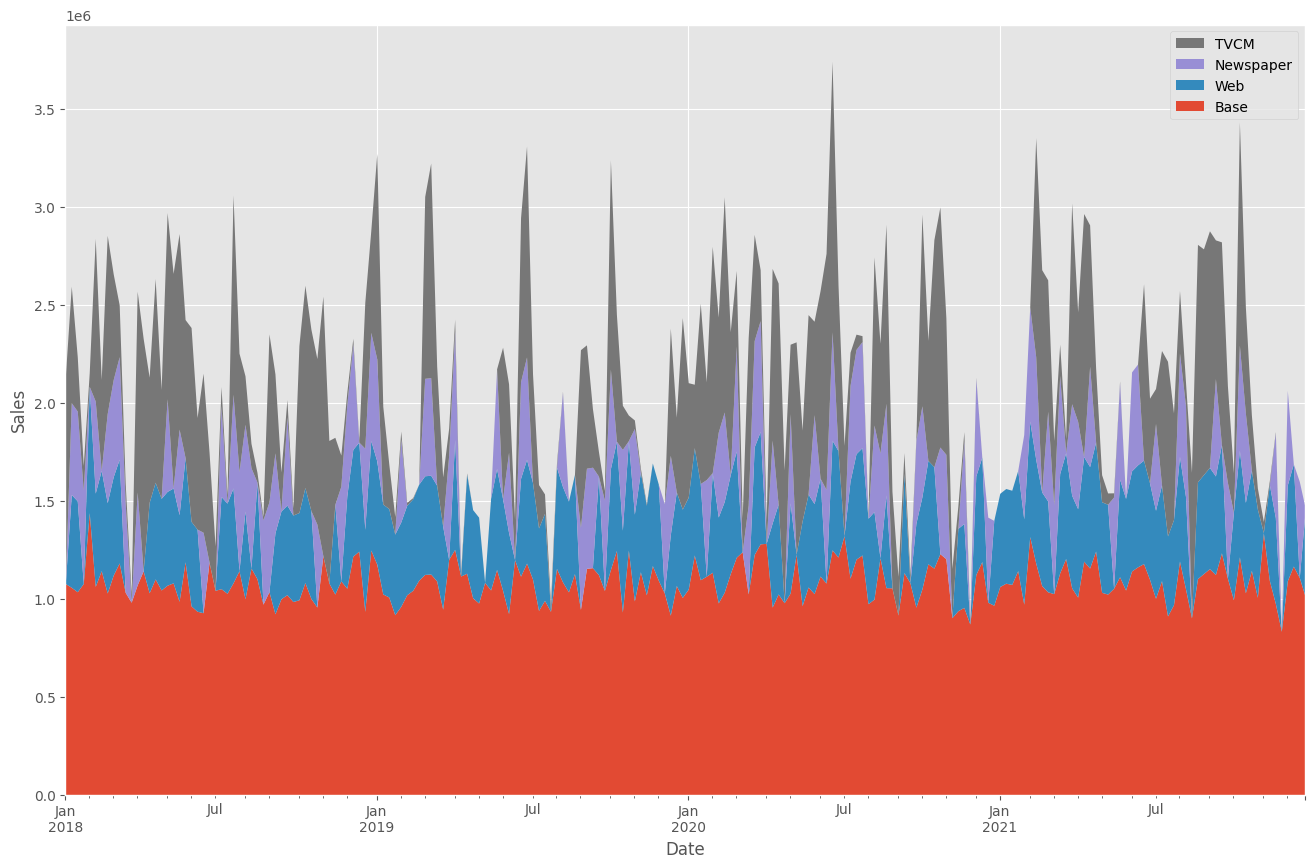

In [35]:
# グラフ化
ax = (adj_contribution
      .plot.area(
          figsize=(16, 10),
          linewidth=0,
          ylabel='Sales',
          xlabel='Date')
     )

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

    媒体別に全ての週の売上貢献度を合計し、媒体別の売上貢献度（円と構成比％）と、
    そのグラフを作り、何がどれほど売上に貢献したのかを見てみます。

    以下、コードです。

売上貢献度（円）:
Base        225172046.785
Web          76170362.523
Newspaper    45572644.640
TVCM         91641046.052
dtype: float64

売上貢献度（構成比）:
Base        0.513
Web         0.174
Newspaper   0.104
TVCM        0.209
dtype: float64


<Axes: >

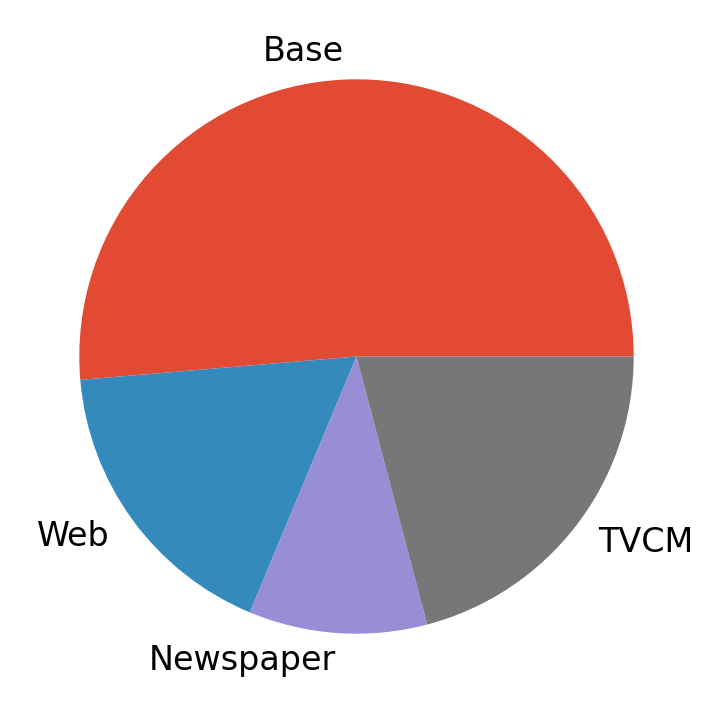

In [36]:
# 媒体別の貢献度の合計
contribution_sum = adj_contribution.sum(axis=0)

#集計結果
print('売上貢献度（円）:\n',
      contribution_sum,
      sep=''
     )

print()

print('売上貢献度（構成比）:\n',
      contribution_sum/contribution_sum.sum(),
      sep=''
     )

#グラフ化
contribution_sum.plot.pie(fontsize=24)

    費用対効果を見てみます。今回は媒体別にROIを計算します。

    先ず、媒体別のコストを集計します。

    以下、コードです。

In [37]:
# 各媒体のコストの合計
cost_sum = X.sum(axis=0)
cost_sum #確認

TVCM         58147500
Newspaper    45986200
Web          31329300
dtype: int64

    先程求めた売上貢献度を使い、媒体別のROIを計算しグラフ化します。

    以下、コードです。

ROI:
Newspaper   -0.009
TVCM         0.576
Web          1.431
dtype: float64


<Axes: >

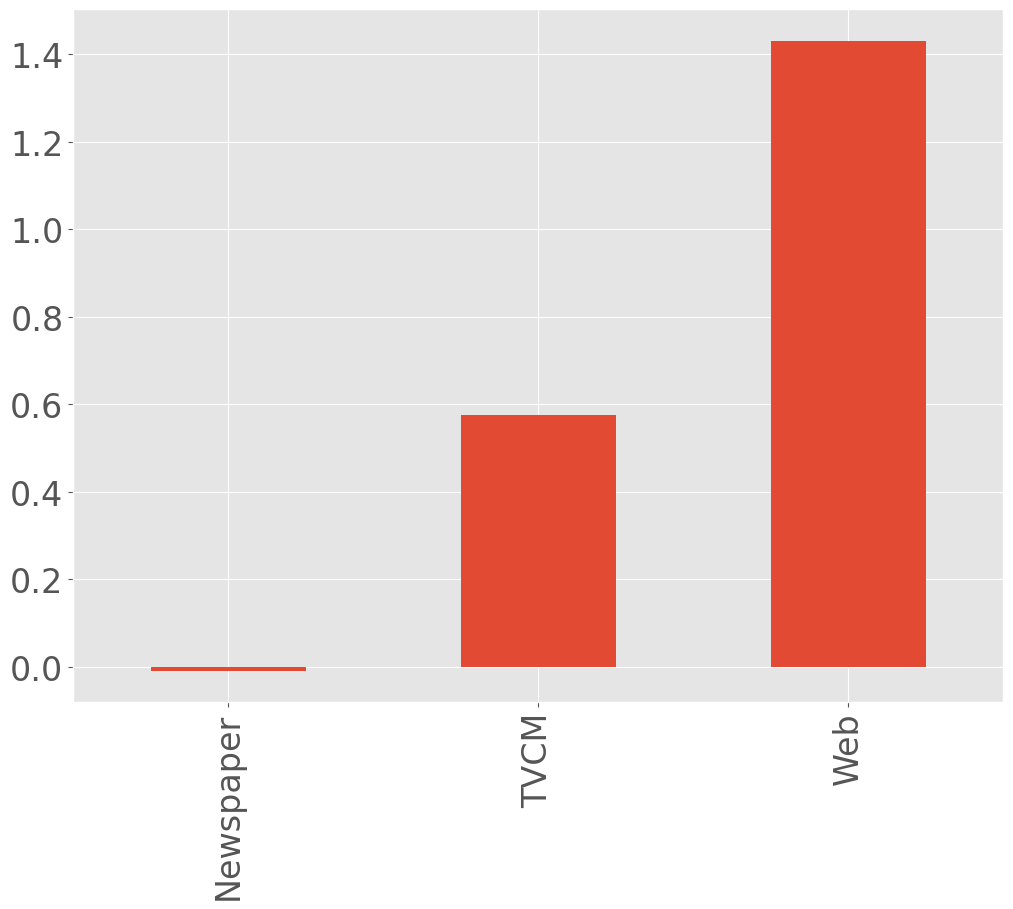

In [38]:
# 各媒体のROIの計算
ROI = (contribution_sum.drop('Base', axis=0) - cost_sum)/cost_sum

#確認
print('ROI:\n', ROI, sep='')

# グラフ化
ROI.plot.bar(fontsize=24)

    ROIは、値が大きいほど良く、最低限プラスの値である必要があります。少なくとも0以上である必要があります。

    このモデルは、アドストック（Ad Stock）を考慮していますが、
    キャリーオーバー効果モデルの作り方から分かりますが、最初に効果のピークが来て徐々に効果が減衰するモデルです。

    現実はそうではなく、効果のピークが最初に来ることもあれば、
    数日後や数週間後にピークが来ることもあります。そのようなモデルの方がいいでしょう。

    今回は最適なハイパーパラメータを1つ探索するということをしましたが、
    別のハイパーパラメータの組み合わせでも同じ程度のレベルの予測精度になる可能性もあります。

    ハイパーパラメータを1つとするのではなく、ある分布の代表値として見なす考え方もあります。
    そのためには、ベイズモデルでMMMを構築する必要があります。

## 次回
    今回は、「アドストック（Ad Stock）を考慮した線形回帰モデル」というお話しをしました。

    次回は、「ちょっと複雑なアドストック（Ad Stock）を考慮した線形回帰モデル」というお話しをします。